# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


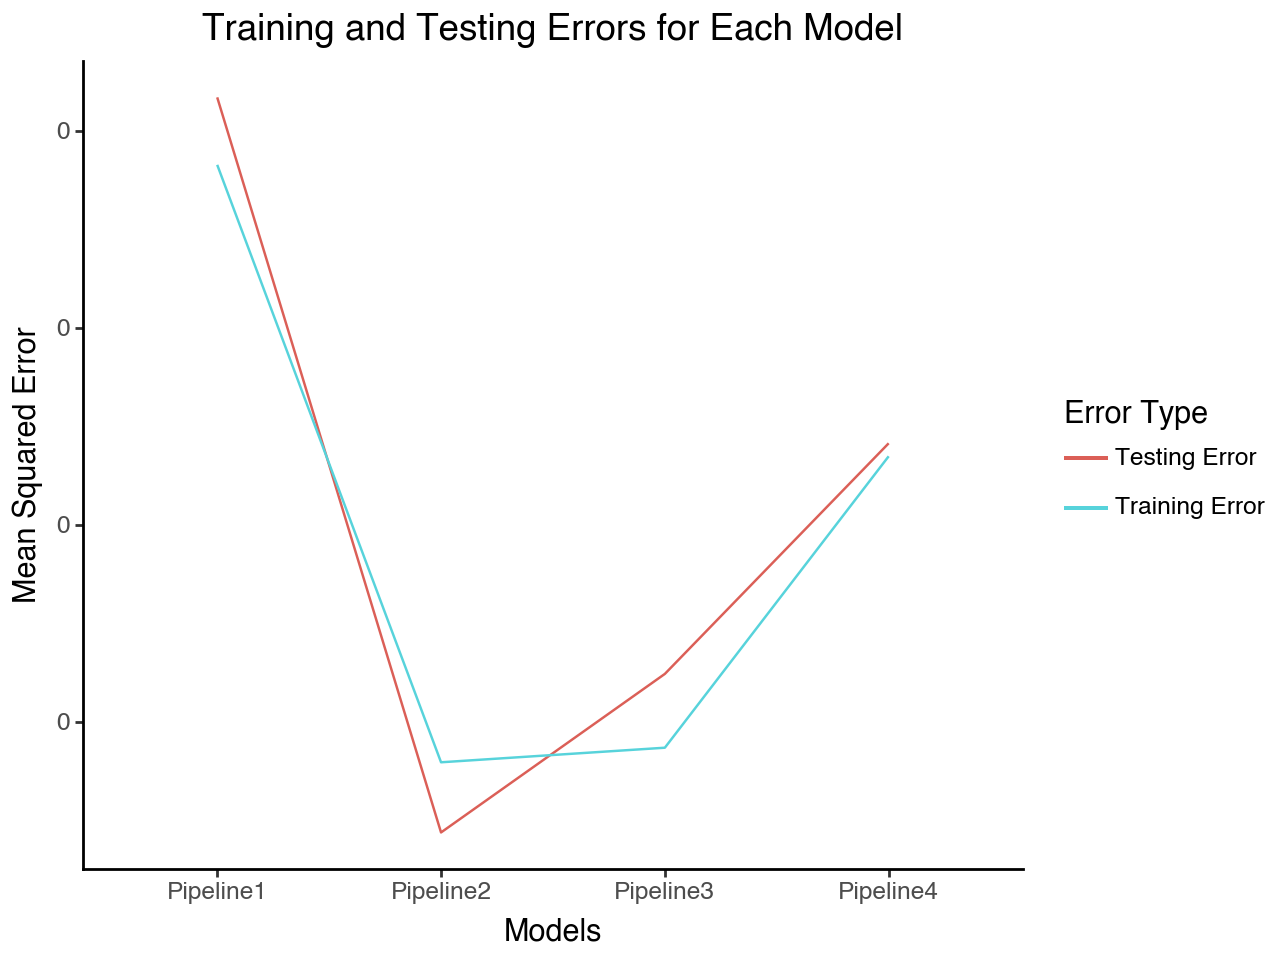

In [24]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, labs, theme_classic, scale_x_continuous


penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

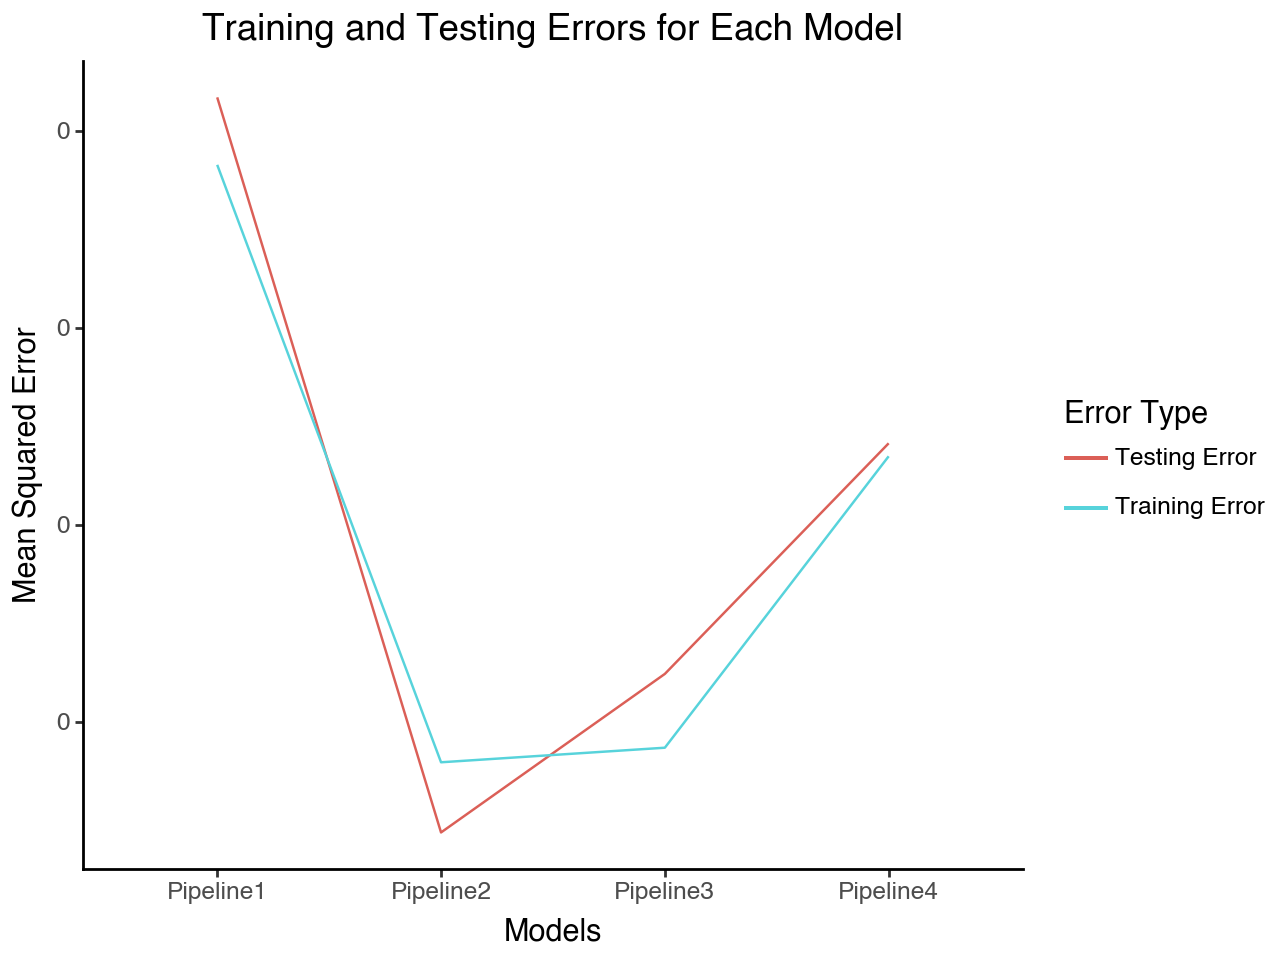

In [26]:

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "species", "island"])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)



Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

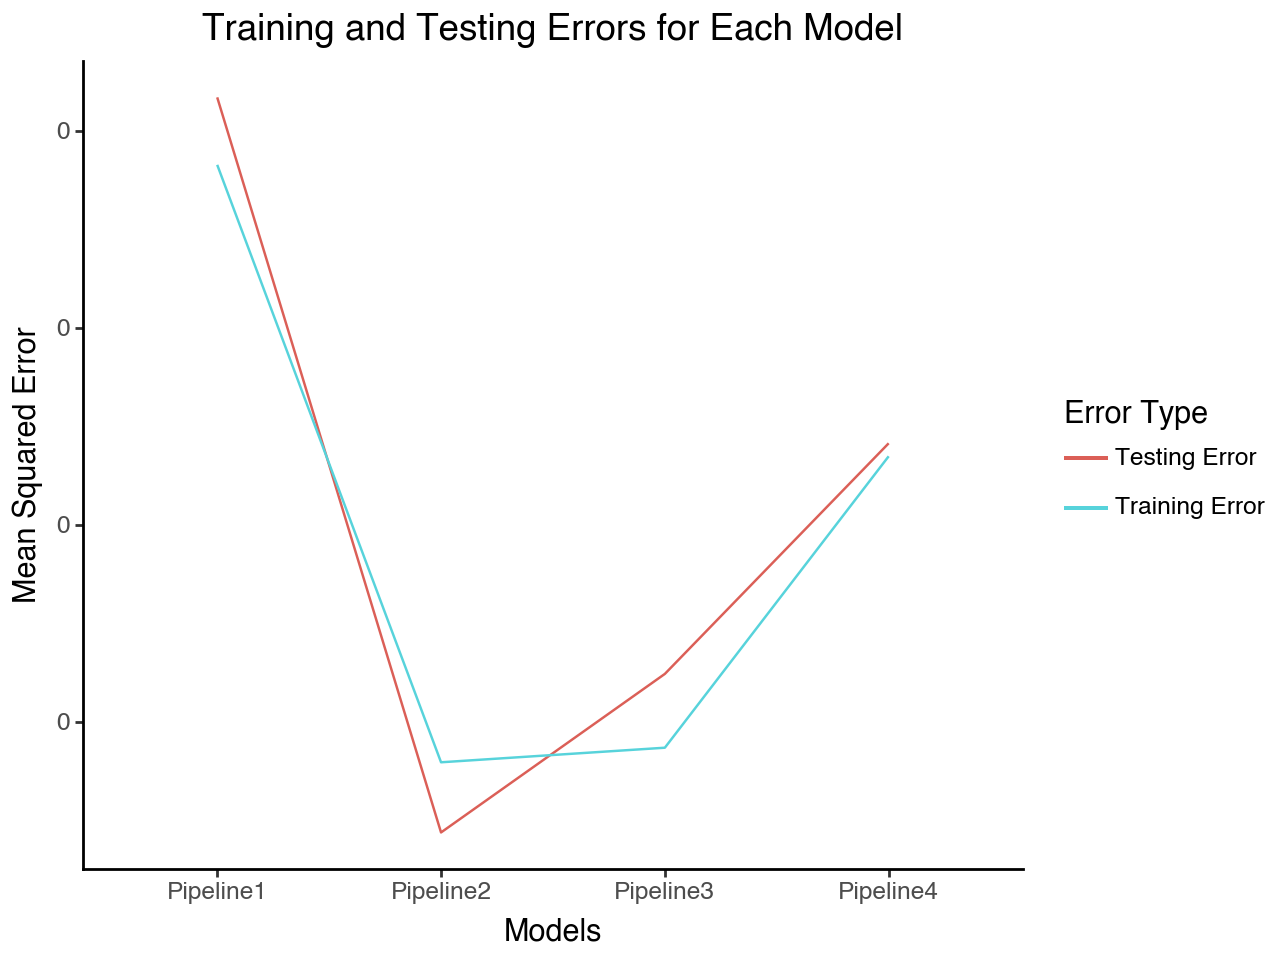

In [27]:
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_length_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)


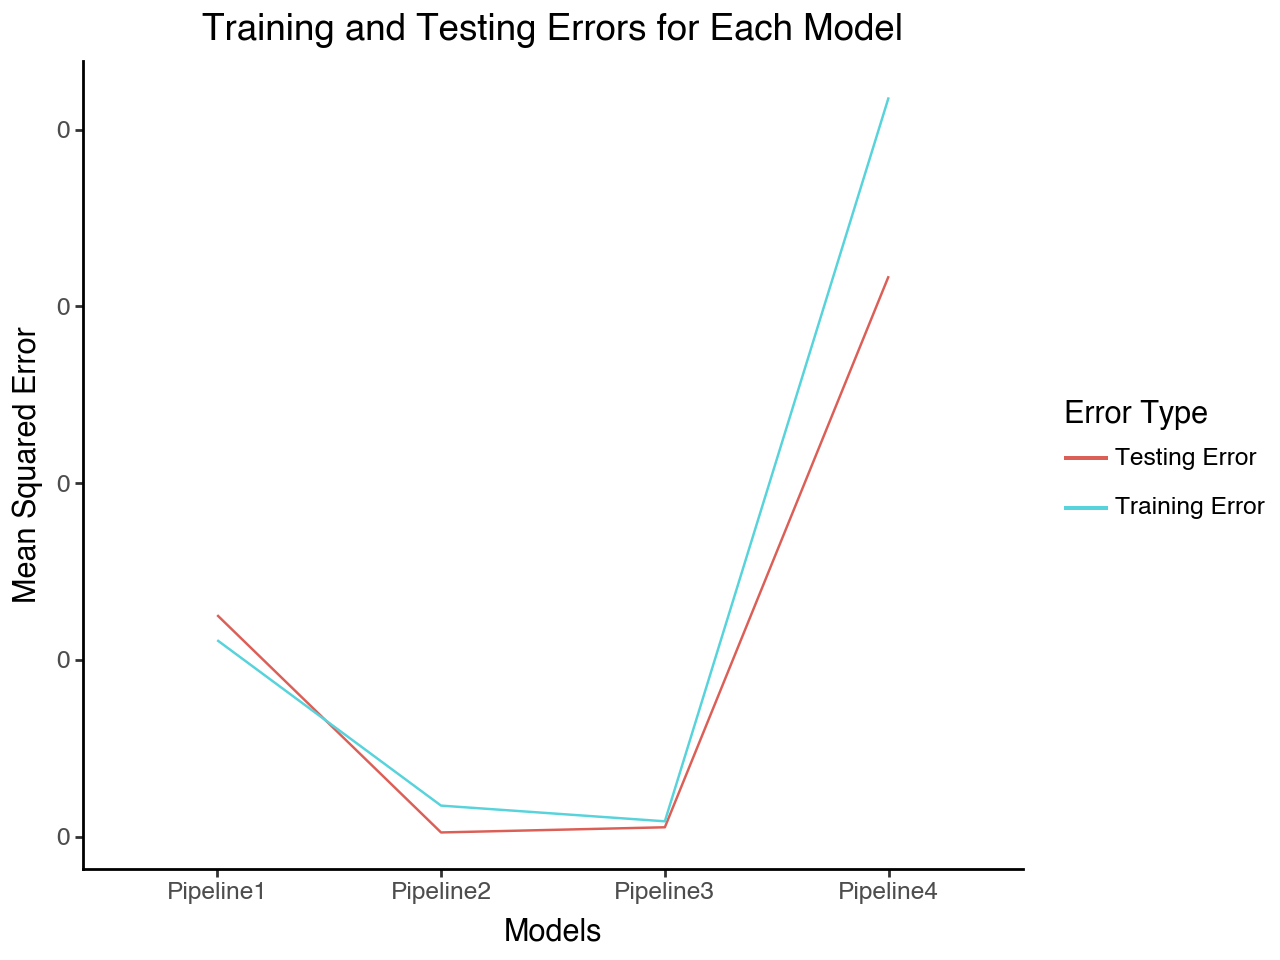


Lowest train error: Model 3 - 5.437072085215589e-29
Lowest test error: Model 2 - 5.12187950056541e-29


Lowest train error: Model 3 - 5.437072085215589e-29
Lowest test error: Model 2 - 5.12187950056541e-29


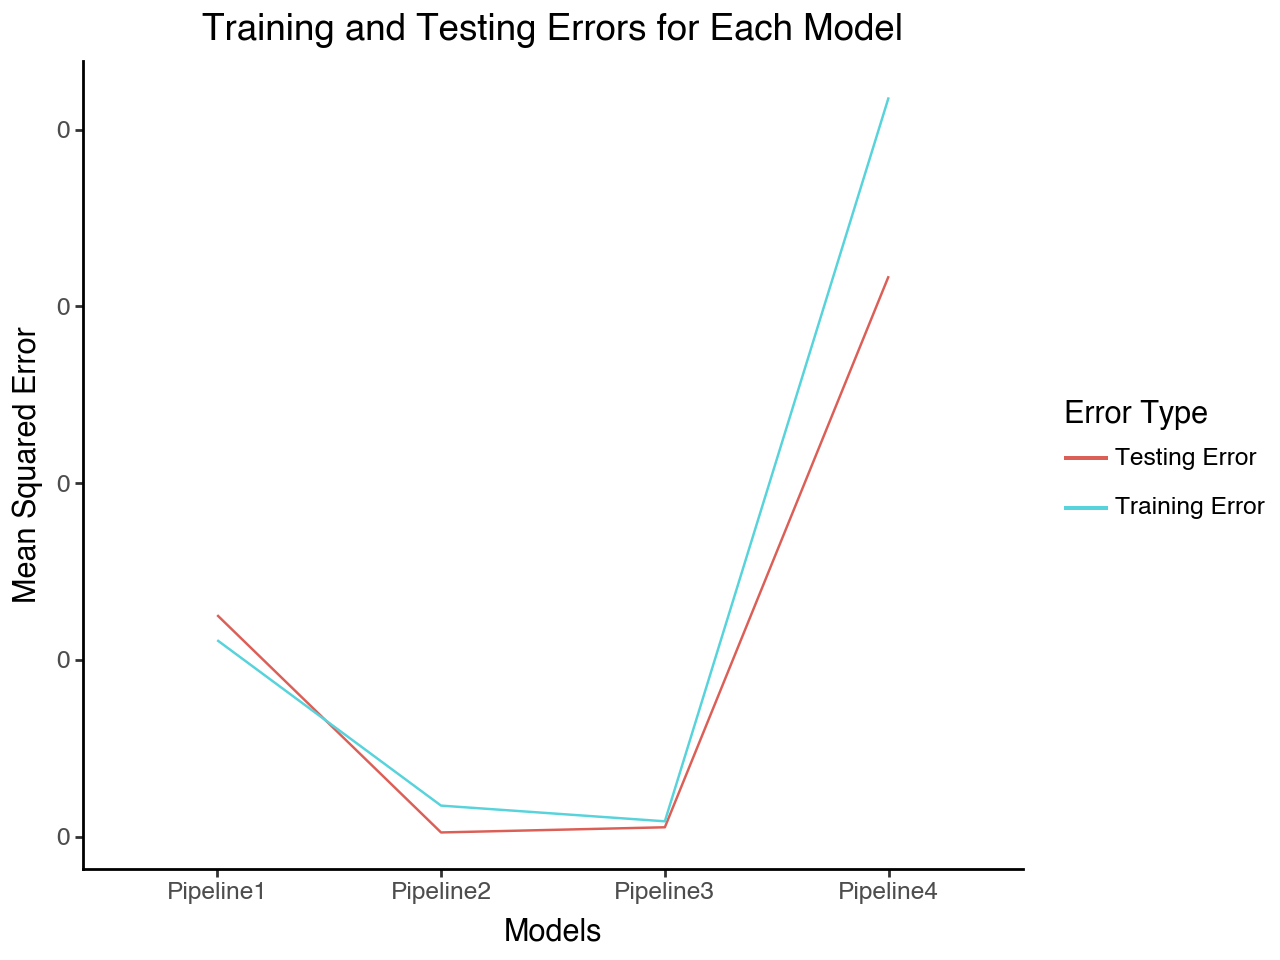

In [28]:
import warnings

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model 1
num_transform1 = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform1 = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])
ct1 = ColumnTransformer([
    ('num', num_transform1, ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']),
    ("cat", cat_transform1, ['species', 'island', 'sex'])
])
pipeline1 = Pipeline([
    ("preprocessor", ct1),
    ("regressor", LinearRegression())
])
pipeline1.fit(X_train, y_train)

# Model 2
num_transform2 = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform2 = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])
ct2 = ColumnTransformer([
    ('num', num_transform2, ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    ("cat", cat_transform2, ['species', 'island', 'sex'])
])
pipeline2 = Pipeline([
    ("preprocessor", ct2),
    ("regressor", LinearRegression())
])
pipeline2.fit(X_train, y_train)

# Model 3
num_transform3 = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform3 = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])
ct3 = ColumnTransformer([
    ('num', num_transform3, ['bill_length_mm', 'flipper_length_mm']),
    ("cat", cat_transform3, ['species', 'island', 'sex'])
])
pipeline3 = Pipeline([
    ("preprocessor", ct3),
    ("regressor", LinearRegression())
])
pipeline3.fit(X_train, y_train)

# Model 4
num_transform4 = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform4 = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])
ct4 = ColumnTransformer([
    ('num', num_transform4, ['bill_length_mm', 'flipper_length_mm']),
    ("cat", cat_transform4, ['species', 'sex'])
])
pipeline4 = Pipeline([
    ("preprocessor", ct4),
    ("regressor", LinearRegression())
])
pipeline4.fit(X_train, y_train)

# Calculate training and testing errors for each model
train_error_1 = mean_squared_error(y_train, pipeline1.predict(X_train))
test_error_1 = mean_squared_error(y_test, pipeline1.predict(X_test))

train_error_2 = mean_squared_error(y_train, pipeline2.predict(X_train))
test_error_2 = mean_squared_error(y_test, pipeline2.predict(X_test))

train_error_3 = mean_squared_error(y_train, pipeline3.predict(X_train))
test_error_3 = mean_squared_error(y_test, pipeline3.predict(X_test))

train_error_4 = mean_squared_error(y_train, pipeline4.predict(X_train))
test_error_4 = mean_squared_error(y_test, pipeline4.predict(X_test))

train_errors = [train_error_1, train_error_2, train_error_3, train_error_4]
test_errors = [test_error_1, test_error_2, test_error_3, test_error_4]


# get data for ggplot
df_errors = pd.DataFrame({
    'Model': ['Pipeline1', 'Pipeline2', 'Pipeline3', 'Pipeline4'],
    'Training Error': train_errors,
    'Testing Error': test_errors
}).melt(id_vars='Model', var_name='Error Type', value_name='Mean Squared Error')

# Plot
plot = (ggplot(df_errors, aes(x='Model', y='Mean Squared Error', color='Error Type', group='Error Type'))
        + geom_line()
        + labs(x='Models', y='Mean Squared Error', title='Training and Testing Errors for Each Model')
        + theme_classic())

print(plot)


# Print the model with the lowest error
print(f"Lowest train error: Model {np.argmin(train_errors) + 1} - {min(train_errors)}")
print(f"Lowest test error: Model {np.argmin(test_errors) + 1} - {min(test_errors)}")


Model 2 is the best according to Mean Square error values. 